<a href="https://colab.research.google.com/github/Nidzam81/Computer-Vision/blob/main/Police_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pwd

/content


In [ ]:
!ls

sample_data


In [ ]:
!git clone https://github.com/matterport/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 931, done.
remote: Total 931 (delta 0), reused 0 (delta 0), pack-reused 931
Receiving objects: 100% (931/931), 139.81 MiB | 37.58 MiB/s, done.
Resolving deltas: 100% (526/526), done.


In [ ]:
!git clone https://github.com/philferriere/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 994, done.
remote: Total 994 (delta 0), reused 0 (delta 0), pack-reused 994
Receiving objects: 100% (994/994), 12.24 MiB | 33.69 MiB/s, done.
Resolving deltas: 100% (592/592), done.


In [ ]:
!pip install git+https://github.com/philferriere/cocoapi.git#subdirectory=PythonAPI

  Cloning https://github.com/philferriere/cocoapi.git to /tmp/pip-req-build-2dicvyh1
  Stored in directory: /tmp/pip-ephem-wheel-cache-2s5ym7wz/wheels/69/2b/12/2fa959e49f73d26cff202c2f4e5079096c9c57c8a8509fd75c
Successfully built pycocotools


In [ ]:
!ls

cocoapi  Mask_RCNN  sample_data


In [ ]:
%cd ..

/content


In [ ]:
!git clone https://github.com/waleedka/coco

Cloning into 'coco'...
remote: Enumerating objects: 904, done.
remote: Total 904 (delta 0), reused 0 (delta 0), pack-reused 904
Receiving objects: 100% (904/904), 10.39 MiB | 33.14 MiB/s, done.
Resolving deltas: 100% (541/541), done.


In [ ]:
!pip install -U setuptools
!pip install -U wheel
!make install -C coco/PythonAPI

    100% |████████████████████████████████| 583kB 5.7MB/s 
cufflinks 0.14.6 has requirement plotly>=3.0.0, but you'll have plotly 1.12.12 which is incompatible.
  Found existing installation: setuptools 40.7.0
    Uninstalling setuptools-40.7.0:
      Successfully uninstalled setuptools-40.7.0


Requirement already up-to-date: wheel in /usr/local/lib/python3.6/dist-packages (0.32.3)
make: Entering directory '/content/coco/PythonAPI'
# install pycocotools to the Python site-packages
python setup.py build_ext install
Compiling pycocotools/_mask.pyx because it changed.
[1/1] Cythonizing pycocotools/_mask.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/coco/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
running build_ext
building 'pycocotools._mask' extension
creating build
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/pycocotools
creating build/common
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.6/dist-packages/numpy/core/inc

In [ ]:
%cd /content/Mask_RCNN/

/content/Mask_RCNN


In [ ]:
!ls

assets	LICENSE      mrcnn	requirements.txt  setup.cfg
images	MANIFEST.in  README.md	samples		  setup.py


In [ ]:
from datetime import datetime
import os
import psutil
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
#ROOT_DIR = os.path.abspath("/home/thiemi/MaskRCNN/Mask_RCNN")
ROOT_DIR = os.path.abspath("/content/Mask_RCNN/")
# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn.config import Config
from mrcnn import visualize
# Import COCO config
#sys.path.append(os.path.abspath("/home/thiemi/Coco/coco/PythonAPI"))  # To find local version

#sys.path.append('E:/Polis/cocoapi/PythonAPI/pycocotools')
#from pycocotools.coco import coco
import coco

#get_ipython().magic(u'matplotlib inline')

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_object_detection_0200.h5")
# Download COCO trained weights from Releases if needed
#if not os.path.exists(COCO_MODEL_PATH):
#    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

print(ROOT_DIR)
print(COCO_MODEL_PATH)
print(MODEL_DIR) 

/content/Mask_RCNN
/content/Mask_RCNN/mask_rcnn_object_detection_0200.h5
/content/Mask_RCNN/logs


In [ ]:
class CocoConfig(Config):
    """Configuration for training on MS COCO.
    Derives from the base Config class and overrides values specific
    to the COCO dataset.
    """
    # Give the configuration a recognizable name
    NAME = "coco"

    # We use a GPU with 12GB memory, which can fit two images.
    # Adjust down if you use a smaller GPU.
    IMAGES_PER_GPU = 2

    # Uncomment to train on 8 GPUs (default is 1)
    # GPU_COUNT = 8

    # Number of classes (including background)
    #NUM_CLASSES = 37  # COCO has 80 classes
    NUM_CLASSES = 3

In [ ]:
class InferenceConfig(CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    #MAX_GT_INSTANCES = 100
    #TRAIN_ROIS_PER_IMAGE = 50
    #BACKBONE = "resnet50" #not working at all!
    #RPN_ANCHOR_STRIDE = 2
    POST_NMS_ROIS_TRAINING = 1000
    POST_NMS_ROIS_INFERENCE = 500
    IMAGE_MIN_DIM = 400 #really much faster but bad results
    IMAGE_MAX_DIM = 512
    #DETECTION_MAX_INSTANCES = 50 #a little faster but some instances not recognized

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                15
IMAGE_MIN_DIM                  400
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE             

In [ ]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

In [ ]:
!cd /content/Mask_RCNN/logs

/bin/bash: line 0: cd: /content/Mask_RCNN/logs: No such file or directory


In [ ]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['background', 'Gun', 'Gun component']

Processing 1 images
image                    shape: (768, 929, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max:  929.00000  float64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32


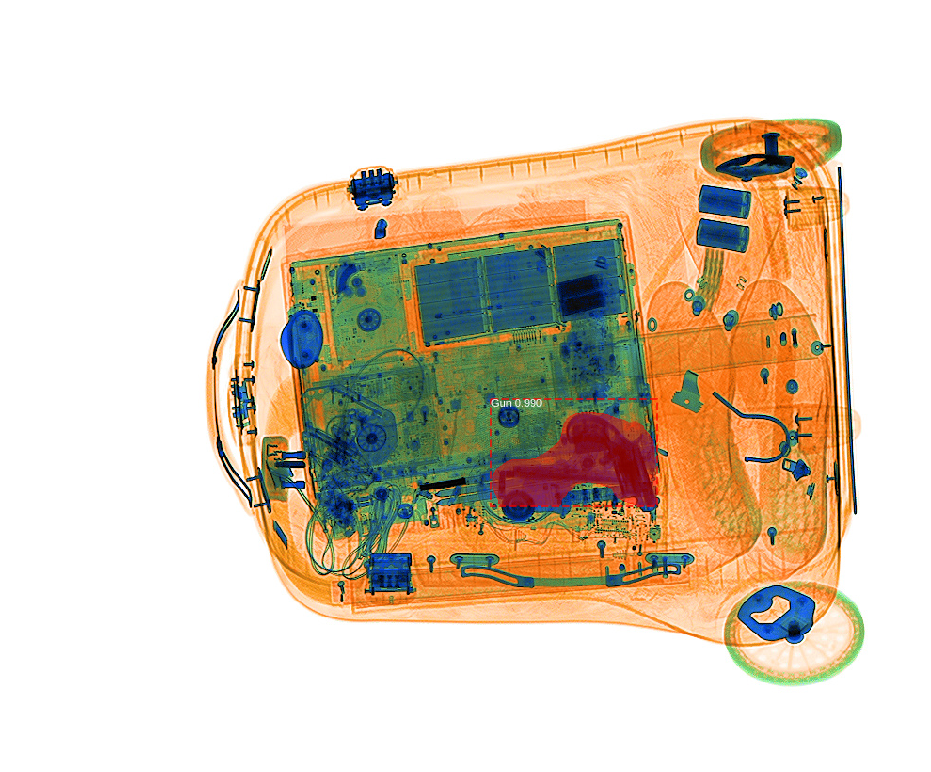

In [ ]:
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])